Dataset used here be found on Kaggle webiste (https://www.kaggle.com/c/titanic/data).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
titanic_dataset = pd.read_csv("titanic.csv")

In [3]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Preprocessing

    1. Create new dataframe with colums that will determine clusters
    2. Encode Sex colum to 0 and 1
    3. Use PCA for dimensionality reduction, so we can plot datapoints easily
    
As you can see there is one column called Age which is not in  the same scale as the rest of our data, BUT because we are use PCA everything will be on the same scale.


### Creating new dataframe

In [4]:
set_to_use = titanic_dataset
set_to_use = set_to_use.drop('Name', axis=1)
set_to_use = set_to_use.drop('Ticket', axis=1)
set_to_use = set_to_use.drop('Fare', axis=1)
set_to_use = set_to_use.drop('Embarked', axis=1)
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


In [5]:
set_to_use.fillna(0, inplace=True)

In [6]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0


### Encoding Sex column using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(set_to_use.iloc[:, 3])

In [9]:
set_to_use['Sex'] = encoded_sex

In [10]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,1,22.0,1,0,0
1,2,1,1,0,38.0,1,0,C85
2,3,1,3,0,26.0,0,0,0
3,4,1,1,0,35.0,1,0,C123
4,5,0,3,1,35.0,0,0,0


In [11]:
features = set_to_use.iloc[:, 1:-1].values

In [12]:
print(features)

[[ 0.  3.  1. 22.  1.  0.]
 [ 1.  1.  0. 38.  1.  0.]
 [ 1.  3.  0. 26.  0.  0.]
 ...
 [ 0.  3.  0.  0.  1.  2.]
 [ 1.  1.  1. 26.  0.  0.]
 [ 0.  3.  1. 32.  0.  0.]]


### Using Principal Component Analysis for dimensionality reduction

In [13]:
from sklearn.decomposition import PCA

In [14]:
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

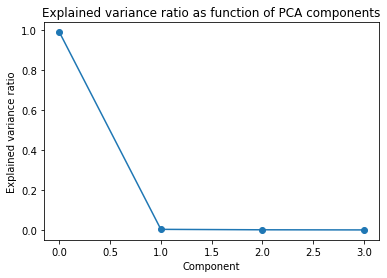

In [15]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

This PCA above with 4 components was for testing. We will need 2 components for 2D plotting, also for every clustering algorithm we are going to use reduced_features with 2 features.

In [16]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

## Clustering

Firstly we are going to use SKlearn version of KMeans

In [17]:
from sklearn.cluster import KMeans

Starting with version of 5 clusters.

In [23]:
km = KMeans(n_clusters=3)
clusters = km.fit(reduced_features)

In [24]:
clusters

KMeans(n_clusters=3)

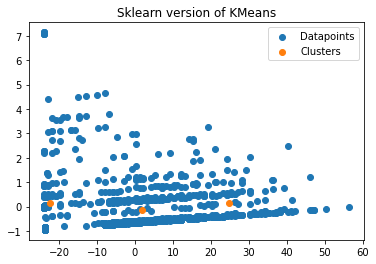

In [25]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [26]:
reduced_features.shape

(891, 2)

In [27]:
clusters.cluster_centers_

array([[ 24.84434236,   0.1470704 ],
       [  1.92883884,  -0.15029244],
       [-22.37241143,   0.1642493 ]])